In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
data = pd.read_csv('../../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(15)

import sys
sys.path.insert(0, '.')
sys.path.insert(1, '../../01_exploratory_data_analysis/rainfall')

from utils import diff

In [3]:
gdp_g = pd.DataFrame()
for country in data['ISO3_code'].unique():
    gdp = data[data['ISO3_code']==country].gdp
    gdp_diff = diff(gdp)
    gdp_diff = np.concatenate(([gdp_diff[0]], gdp_diff))
    gdp_diff[np.where(gdp_diff > 1)] = 0

    years = data[data['ISO3_code']==country].Year

    to_add = pd.DataFrame({'ISO3_code': [country]*len(gdp_diff),
                           'Year': years,
                           'gdp_g': gdp_diff
                           })
    gdp_g = pd.concat([gdp_g, to_add])

data = data.merge(gdp_g, on=['ISO3_code', 'Year'])

In [4]:
data.sample(10)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,gdp_g
6680,PRY,1989,21.110367,0.000000,2.000000,1.573540e+10,Paraguay,0.142,1003.760047,0.250487,-0.272118,233.782506,0.001453,0.000986,0.069352
3413,HND,1970,29.322268,0.000000,-1.000000,3.962620e+09,Honduras,0.165,1698.196759,-0.107014,0.110079,239.412037,-0.010296,0.026754,0.036267
2536,EST,1989,5.051828,0.233222,-4.000000,9.855880e+09,Estonia,0.520,544.348214,-0.043240,-0.008295,68.205357,0.245625,0.752190,0.000000
4988,LVA,1961,8.054696,0.000000,-7.000000,1.144438e+10,Latvia,0.603,508.923810,-0.118681,-0.118681,66.357143,0.228132,0.228132,0.000000
8815,ZMB,2000,16.149773,0.000000,1.000000,8.059030e+09,Zambia,0.756,914.262092,0.229716,-0.068606,217.656536,0.005995,-0.032186,0.038973
5623,MWI,2020,25.015010,0.000000,-2.218182,1.092818e+10,Malawi,0.791,916.921171,-0.240700,0.179321,228.407658,-0.002910,0.009579,0.007936
6199,NZL,2020,5.714468,0.043908,9.864198,2.015542e+11,New Zealand,0.485,1333.992098,-0.089184,0.110573,108.938218,-0.004118,-0.013450,-0.004249
3188,GNB,2001,36.766388,0.000000,5.000000,7.389016e+08,Guinea-Bissau,0.808,1100.958333,-0.096907,-0.173622,281.083333,0.011875,0.008725,0.047860
4062,JOR,1970,10.770578,0.000000,-9.000000,5.730509e+09,Jordan,0.035,78.297980,-0.188643,-0.069900,184.335859,-0.018000,0.017939,0.000000
8543,URY,1987,13.711863,0.000000,9.000000,2.510026e+10,Uruguay,0.191,1028.562189,-0.209712,0.201856,178.792289,-0.030466,0.005630,0.079931


In [13]:
from sklearn.linear_model import LinearRegression

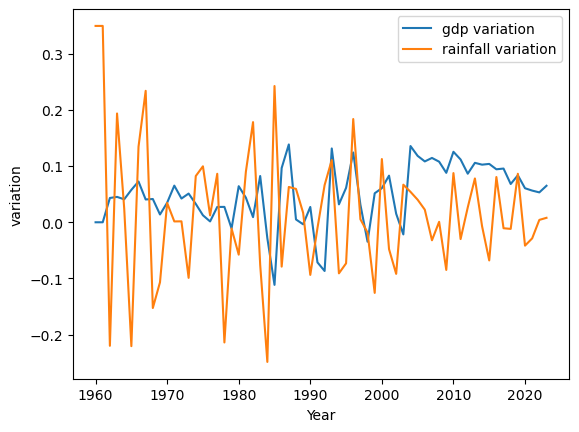

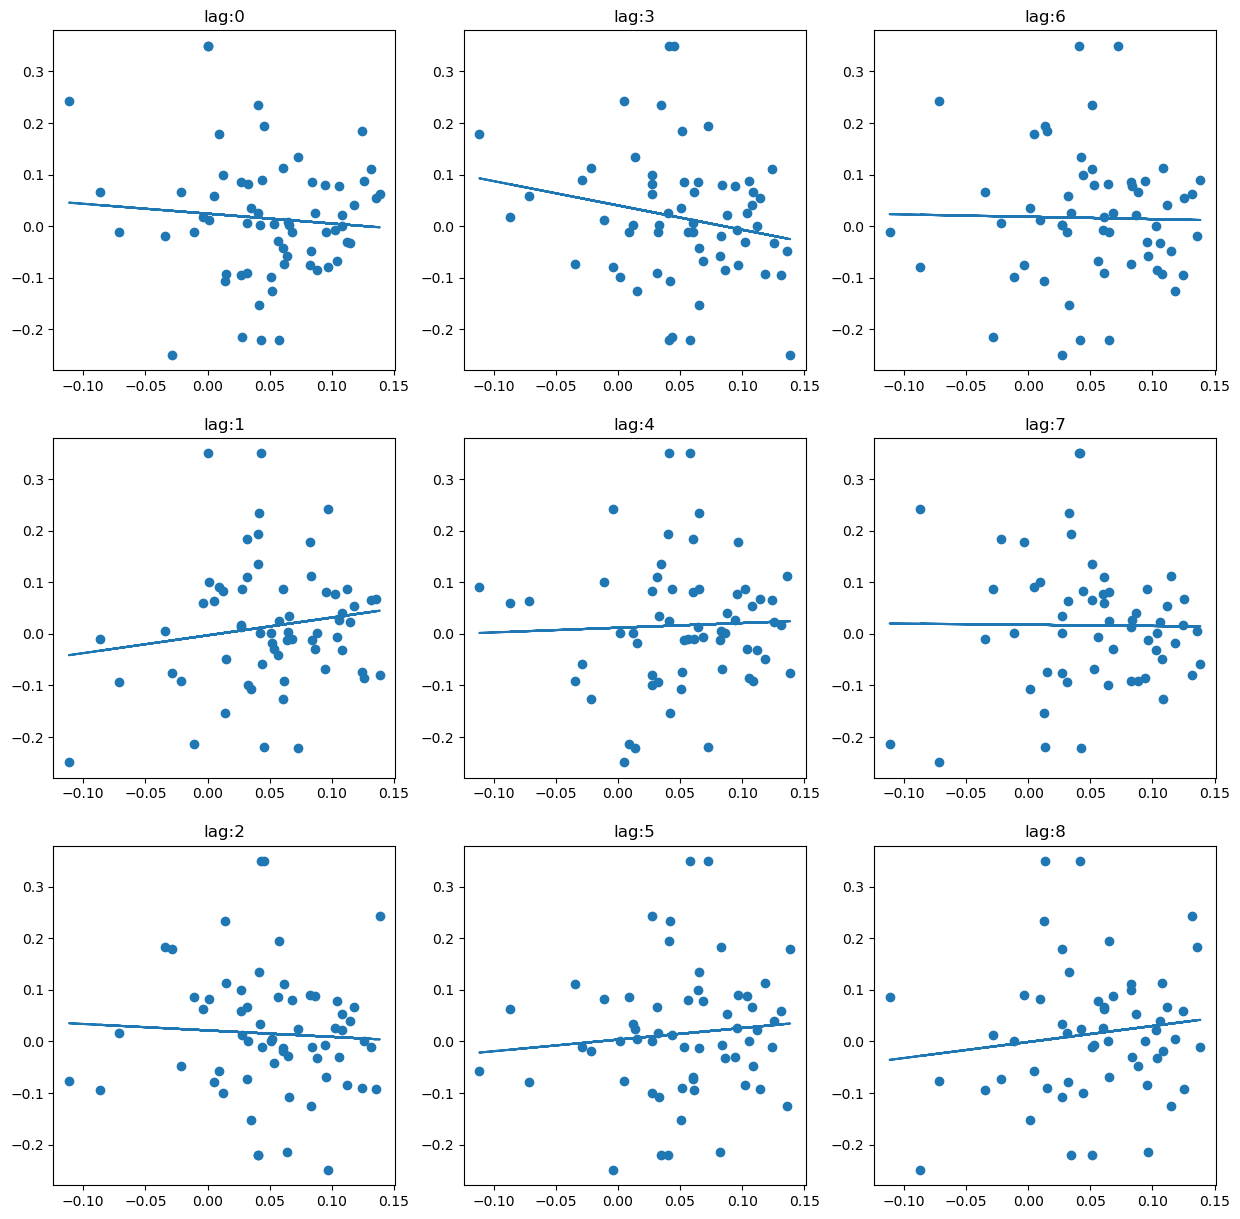

In [16]:
eth_gdp_g = data[data['ISO3_code']=='ETH'].gdp_g
eth_rainfall_var_t = data[data['ISO3_code']=='ETH'].rainfall_var_t
year = data[data['ISO3_code']=='ETH'].Year

plt.plot(year, eth_gdp_g, label='gdp variation')
plt.plot(year, eth_rainfall_var_t, label='rainfall variation')
plt.xlabel('Year')
plt.ylabel('variation')
plt.legend()

fig, ax = plt.subplots(3, 3, figsize=(15,15))
for lag in range(0,9):
    g = eth_gdp_g[lag:].to_numpy().reshape(-1, 1)
    r = eth_rainfall_var_t.to_numpy()
    if lag != 0:
        r = eth_rainfall_var_t[:-lag]
    ix = lag % 3
    iy = lag // 3

    lr = LinearRegression()
    lr.fit(g, r)
    preds = lr.predict(g)

    ax[ix, iy].scatter(g, r)
    ax[ix, iy].plot(g, preds)
    ax[ix, iy].set_title(f'lag:{lag}')

plt.show()

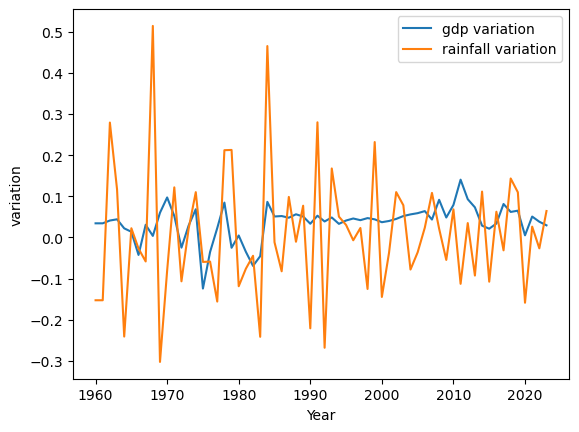

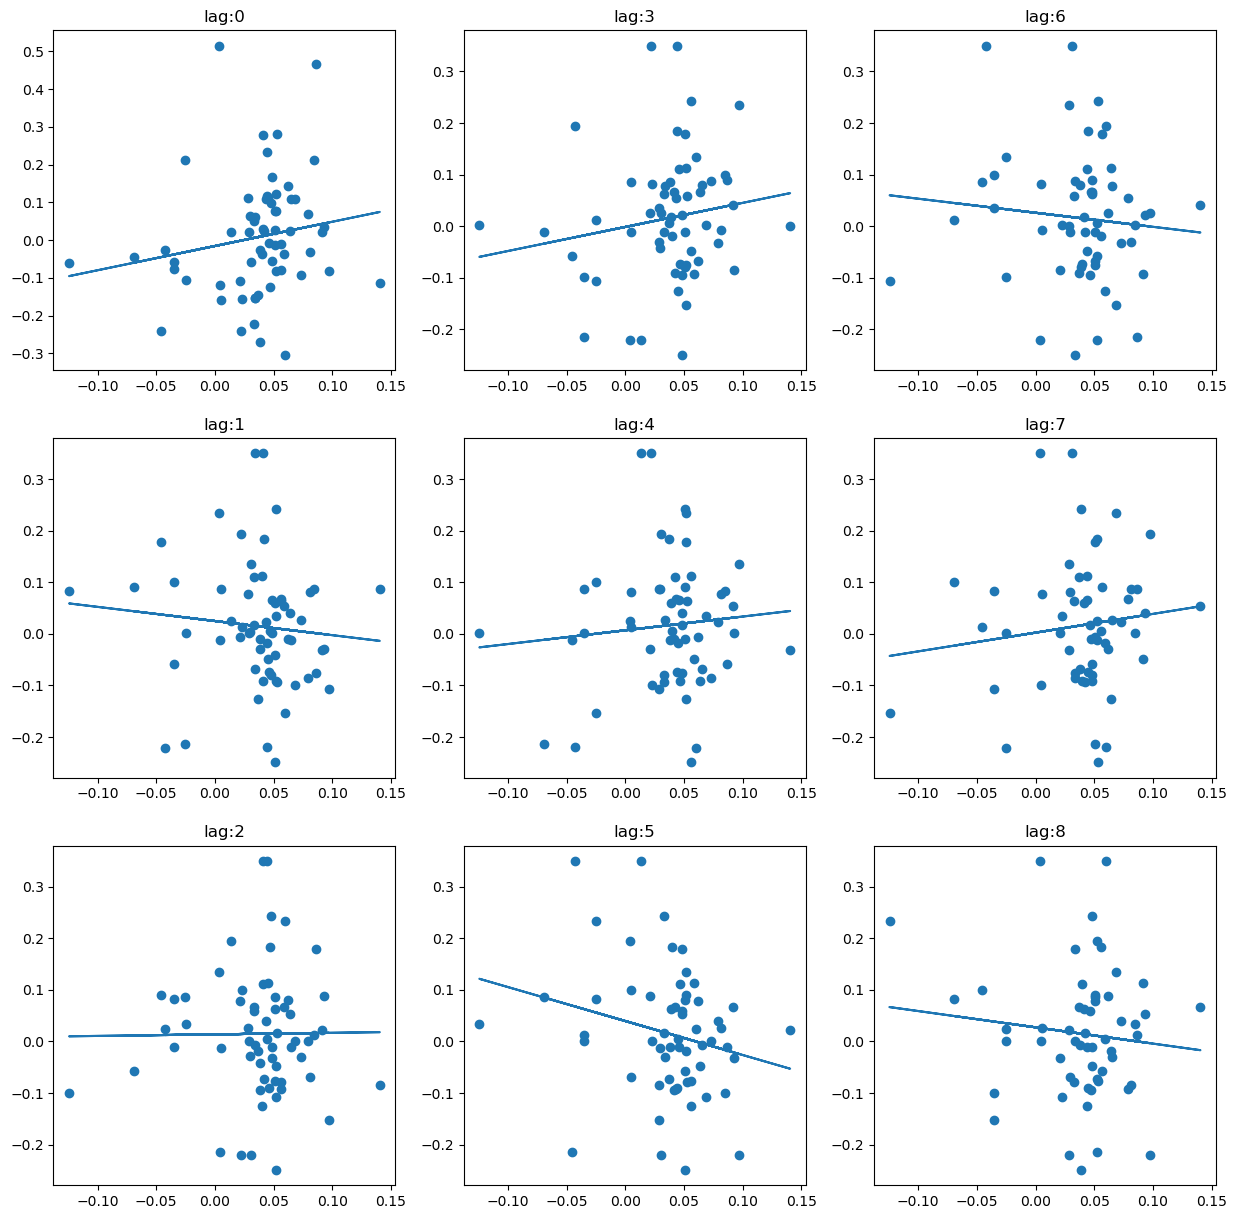

In [17]:
gha_gdp_g = data[data['ISO3_code']=='GHA'].gdp_g
gha_rainfall_var_t = data[data['ISO3_code']=='GHA'].rainfall_var_t
year = data[data['ISO3_code']=='GHA'].Year

plt.plot(year, gha_gdp_g, label='gdp variation')
plt.plot(year, gha_rainfall_var_t, label='rainfall variation')
plt.xlabel('Year')
plt.ylabel('variation')
plt.legend()

fig, ax = plt.subplots(3, 3, figsize=(15,15))
for lag in range(0,9):
    g = gha_gdp_g[lag:].to_numpy().reshape(-1, 1)
    r = gha_rainfall_var_t.to_numpy()
    if lag != 0:
        r = eth_rainfall_var_t[:-lag]
    ix = lag % 3
    iy = lag // 3

    lr = LinearRegression()
    lr.fit(g, r)
    preds = lr.predict(g)

    ax[ix, iy].scatter(g, r)
    ax[ix, iy].plot(g, preds)
    ax[ix, iy].set_title(f'lag:{lag}')

plt.show()

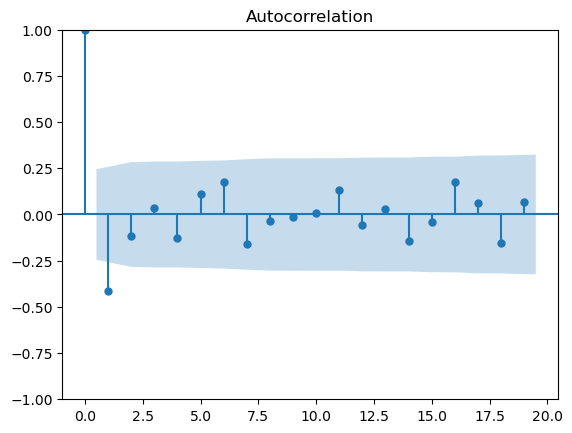

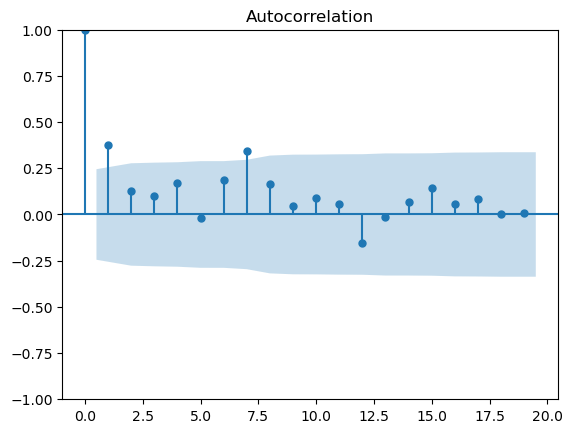

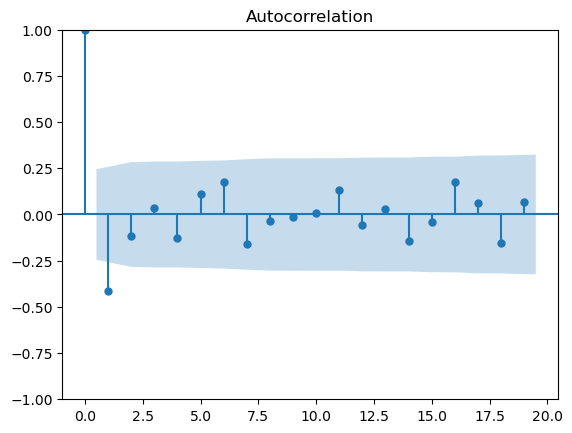

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(gha_gdp_g)
plot_acf(gha_rainfall_var_t)